# Make a Numerical Semigroup

In [16]:
import sys
import os

# Assuming the notebook is in the examples directory and the package is one level up
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
package_root = os.path.abspath(os.path.join(notebook_dir, '..'))
sys.path.insert(0, package_root)

from src.pocketpartition.core.numerical import NumericalSemigroup, NumericalSet
from src.pocketpartition.core.random_numerical import RandomNumericalSemigroupWithGenus

In [17]:
S = NumericalSemigroup(gaps={1,2,3,4,5})

In [7]:
S.minimal_generating_set()

[6, 7, 8, 9, 10, 11]

In [11]:
S.get_children()

[NumericalSemigroup(gaps=[1, 2, 3, 4, 5, 6], frobenius_number=6),
 NumericalSemigroup(gaps=[1, 2, 3, 4, 5, 7], frobenius_number=7),
 NumericalSemigroup(gaps=[1, 2, 3, 4, 5, 8], frobenius_number=8),
 NumericalSemigroup(gaps=[1, 2, 3, 4, 5, 9], frobenius_number=9),
 NumericalSemigroup(gaps=[1, 2, 3, 4, 5, 10], frobenius_number=10),
 NumericalSemigroup(gaps=[1, 2, 3, 4, 5, 11], frobenius_number=11)]

In [17]:
S.partition()

[153,
 129,
 118,
 106,
 106,
 96,
 96,
 86,
 86,
 86,
 76,
 76,
 70,
 67,
 67,
 67,
 58,
 58,
 58,
 57,
 53,
 53,
 51,
 51,
 51,
 46,
 43,
 43,
 43,
 42,
 38,
 38,
 37,
 37,
 37,
 37,
 37,
 33,
 33,
 31,
 31,
 31,
 31,
 31,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [4]:
S = NumericalSemigroup(gaps=range(1,6))

In [5]:
S

In [8]:
S.apery_set(6)

{0, 7, 8, 9, 10, 11}

In [12]:
S.special_gaps()

[3, 4, 5]

In [11]:
S.get_frobchildren()

In [31]:
S = NumericalSemigroup(gaps=range(1,16))
while len(S.special_gaps()) > 1:
    l = [p for p in S.special_gaps() if p != S.frobenius_number]
    S = S.add_specialgap(random.choice(l))
S.partition()

[8, 3, 2, 1, 1, 1, 1, 1]

In [26]:
S.partition()

[8, 1, 1, 1, 1, 1, 1, 1]

In [61]:
def count_paths_dfs(node):
    # If the node has no children, it's a leaf node, so return 0
    if not node.get_frobchildren():
        return 0

    # Initialize a variable to keep track of the number of paths
    total_paths = 0

    # Recursively count paths for each child
    for child in node.get_frobchildren():
        total_paths += count_paths_dfs(child) + 1  # Add 1 for each path to a child

    return total_paths

def count_all_paths(node):
    # Initialize the total number of paths with the count of paths from the current node
    total_paths = count_paths_dfs(node)

    # Recursively count paths for each child and add to the total
    for child in node.get_frobchildren():
        total_paths += count_all_paths(child)

    return total_paths

In [57]:
NumericalSemigroup(gaps={1,3,5}).special_gaps()

[5]

In [65]:
count_paths_dfs(NumericalSemigroup(gaps={1,2,3,4}))

1

In [64]:
count_paths_dfs(NumericalSemigroup(gaps={1,2,3,4,5}))

5

In [54]:
def count_paths_dfs(node):
    # If the node has no children, it's a leaf node, so return (0, 1) for leaf nodes
    if not node.get_frobchildren():
        return (0, 1)

    # Initialize variables to keep track of the number of paths to non-leaf and leaf nodes
    non_leaf_paths = 0
    leaf_paths = 0

    # Recursively count paths for each child
    for child in node.get_frobchildren():
        child_non_leaf_paths, child_leaf_paths = count_paths_dfs(child)
        non_leaf_paths += child_non_leaf_paths + 1  # Count path to each child as non-leaf
        leaf_paths += child_leaf_paths

    return (non_leaf_paths, leaf_paths)

def count_all_paths(node):
    # Initialize variables to keep track of the total number of paths
    total_non_leaf_paths, total_leaf_paths = count_paths_dfs(node)

    # Recursively count paths for each child and add to the totals
    for child in node.get_frobchildren():
        child_non_leaf_paths, child_leaf_paths = count_all_paths(child)
        total_non_leaf_paths += child_non_leaf_paths
        total_leaf_paths += child_leaf_paths

    return (total_non_leaf_paths, total_leaf_paths)

In [20]:
def count_descendants_and_leaves(node, visited=None):
    if visited is None:
        visited = set()

    # If the node is already visited, return (0, 0) to prevent counting it multiple times
    if node.gaps in visited:
        return (0, 0)

    # Mark the node as visited
    visited.add(node.gaps)

    # If the node has no children, it's a leaf node
    if not node.get_frobchildren():
        return (0, 1)

    # Initialize variables to keep track of the number of descendants and leaf nodes
    total_descendants = 0
    total_leaves = 0

    # Recursively count descendants and leaves for each child
    for child in node.get_frobchildren():
        child_descendants, child_leaves = count_descendants_and_leaves(child, visited)
        total_descendants += child_descendants + 1 # Each child is a direct descendant
        total_leaves += child_leaves

    return (total_descendants, total_leaves)


In [21]:
count_descendants_and_leaves(NumericalSemigroup(gaps={1,2,3,4,5}))

(5, 2)

In [22]:
(a, b) = count_descendants_and_leaves(NumericalSemigroup(gaps={1,2,3,4,5}))

In [17]:
count_descendants_and_leaves(NumericalSemigroup(gaps=range(1, F+1)))

(8, 3)

In [15]:
F = 7
(a, b) = count_descendants_and_leaves(NumericalSemigroup(gaps=range(1, F+1)))
(2**(F-1)) - (2*a + b)

45

In [10]:
count_descendants_and_leaves(NumericalSemigroup(gaps={1,2,3}))

(1, 1)

In [55]:
count_paths_dfs(NumericalSemigroup(gaps={1,2,3,4,5}))

(5, 3)

In [14]:
S = RandomGraphWalk(NumericalSemigroup(gaps={1,2,3,4,5,6,7}), 500)

In [15]:
S2 = RandomGraphWalk(S, 200)

In [16]:
S3 = RandomGraphWalk(S2, 100)

In [17]:
len(S3.gaps)

807

In [18]:
T = RandomGraphWalk(S3, 500)

In [27]:
T2 = RandomGraphWalk(T, 100)

In [3]:
S = NumericalSemigroup(gaps={1,2,3})

In [3]:
[s.minimal_generating_set() for s in S.get_children()]

[[5, 6, 7, 8, 9], [4, 6, 7, 9], [4, 5, 7], [4, 5, 6]]

In [5]:
S.get_parent().minimal_generating_set()

[2, 3]

In [2]:
S1 = NumericalSemigroup(gaps = {1,2,5}) # Using Gaps
S2 = NumericalSemigroup(generators= {3, 4}) # From Generators

In [3]:
print(S1.frobenius_number)
print(S2.multiplicity())
print(S1.minimal_generating_set())
print(S1.apery_set(10))
print(S1.effective_weight())

5
3
[3, 4]
{0, 3, 4, 6, 7, 8, 9, 11, 12, 15}
2


In [2]:
S3 = NumericalSemigroup(gaps={1,2,4,5,7})

In [3]:
print(S3.pseudofrobenius_numbers())
print(S3.type())

[5, 7]
2


In [6]:
S3 = NumericalSemigroup(generators = {3, 17, 19})

In [3]:
S3.apery_set(4)

{0, 3, 5, 6}

In [7]:
S3.remove_minimal_generator(3).minimal_generating_set()

[6, 9, 17, 19, 20, 22]

In [3]:
lst = list(S3.apery_set(49))

In [4]:
lst[0] = 49; lst[1] = 3 + 49

In [22]:
NumericalSemigroup(generators=lst)

KeyboardInterrupt: 

In [12]:
S3.minimal_generating_set()

[3, 50, 52]

In [8]:
print(S3.gaps)
print(S3.void())

{1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16}
[2, 5, 8, 11, 14]


In [6]:
S3.gap_poset()

[(1, 1),
 (4, 1),
 (7, 1),
 (10, 1),
 (13, 1),
 (16, 1),
 (2, 2),
 (5, 2),
 (8, 2),
 (11, 2),
 (14, 2),
 (4, 4),
 (7, 4),
 (10, 4),
 (13, 4),
 (16, 4),
 (5, 5),
 (8, 5),
 (11, 5),
 (14, 5),
 (7, 7),
 (10, 7),
 (13, 7),
 (16, 7),
 (8, 8),
 (11, 8),
 (14, 8),
 (10, 10),
 (13, 10),
 (16, 10),
 (11, 11),
 (14, 11),
 (13, 13),
 (16, 13),
 (14, 14),
 (16, 16)]

In [13]:
NumericalSemigroup(gaps={}).minimal_generating_set()

[1]

In [7]:
from partition import *

In [8]:
p = Partition([3,2,1])

In [9]:
p.hook_lengths()

[[5, 3, 1], [3, 1], [1]]

In [10]:
p.is_semigroup()

True

In [11]:
p2 = Partition([2,2])

In [12]:
p2.is_semigroup()

False

In [13]:
p2.atom_partition()

[1, 1, 1]

In [3]:
from pocketpartition.random_numerical import RandomNumericalSemigroupWithGenus

In [16]:
RandomNumericalSemigroupWithGenus(30)

In [2]:
import random
def RandomNumericalSemigroupWithGenus(g):
    """
    Generates a random numerical semigroup with a given genus.
        https://github.com/gap-packages/numericalsgps/blob/master/gap/random.gi
    Parameters:
    g (int): The genus of the numerical semigroup.

    Returns:
    NumericalSemigroup: The generated numerical semigroup.
    """
    s = NumericalSemigroup(generators={1})
    for i in range(g):
        try:
            mingens = s.minimal_generating_set()
            x = random.choice(mingens)
            s = s.remove_minimal_generator(x)
        except:
            print(s.gaps, s.minimal_generating_set(), x)
    return s

In [39]:
S = RandomNumericalSemigroupWithGenus(1000)

In [31]:
with open('genus300_depth3.txt', 'w') as file:
    for element in S.gaps:
        file.write(str(element) + ',')

In [30]:
len(S.minimal_generating_set())

59

In [29]:
300 / 5**(0.5)

134.16407864998737

In [28]:
S.multiplicity()

96

In [32]:
S.partition()

[128,
 83,
 81,
 77,
 76,
 66,
 62,
 59,
 59,
 49,
 49,
 47,
 45,
 45,
 42,
 41,
 40,
 40,
 40,
 39,
 38,
 38,
 38,
 38,
 38,
 38,
 36,
 36,
 34,
 34,
 33,
 33,
 33,
 32,
 32,
 30,
 30,
 29,
 26,
 25,
 23,
 23,
 21,
 21,
 20,
 20,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1

In [18]:
import matplotlib.pyplot as plt

def draw_ferrers_diagram(partition):
    """
    Draws a Ferrers diagram for a given integer partition.

    Parameters:
    partition (list of int): A list of integers representing the partition of an integer. 
                             Each integer corresponds to the number of dots in a row of the diagram.

    Example:
    draw_ferrers_diagram([5, 4, 3, 1]) will draw:
    
    
    **
    *
    """
    # Validate the input
    if not all(isinstance(x, int) and x > 0 for x in partition):
        raise ValueError("All elements in the partition must be positive integers.")

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Draw the Ferrers diagram
    for i, row_length in enumerate(partition):
        for j in range(row_length):
            ax.plot(j, -i, 'ko', markersize=12)  # 'ko' means black color and circle marker

    # Set axis limits and aspect ratio
    ax.set_xlim(-1, max(partition))
    ax.set_ylim(-len(partition), 1)
    ax.set_aspect('equal')
    ax.axis('off')  # Turn off the axis

    # Show the plot
    plt.show()

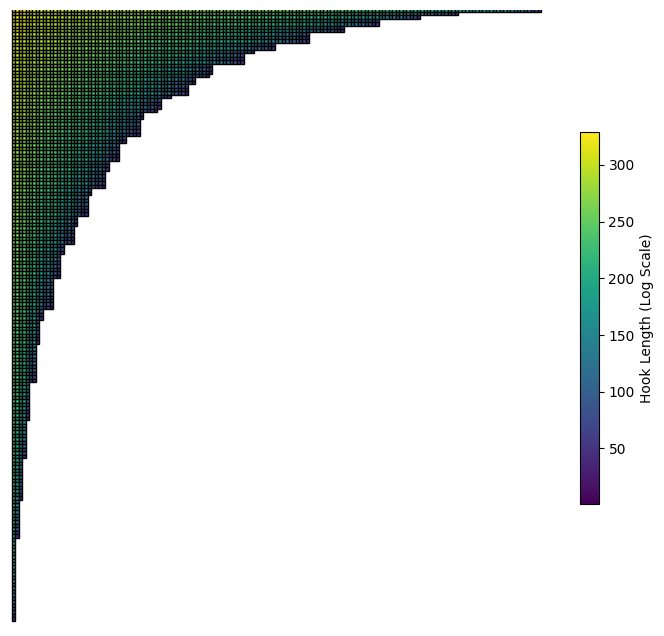

In [29]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

def calculate_hook_lengths(partition):
    n = len(partition)
    hooks = np.zeros((n, max(partition)), dtype=int)
    
    for i in range(n):
        for j in range(partition[i]):
            right = partition[i] - j - 1
            down = sum(1 for k in range(i + 1, n) if partition[k] > j)
            hooks[i, j] = right + down + 1
    
    return hooks

def draw_ferrers_diagram(partition):
    """
    Draws a Ferrers diagram with boxes for a given integer partition.
    Colors the boxes based on hook lengths.

    Parameters:
    partition (list of int): A list of integers representing the partition of an integer. 
                             Each integer corresponds to the number of boxes in a row of the diagram.
    """
    # Validate the input
    if not all(isinstance(x, int) and x > 0 for x in partition):
        raise ValueError("All elements in the partition must be positive integers.")

    # Calculate hook lengths
    hook_lengths = calculate_hook_lengths(partition)
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Define colormap
    cmap = plt.get_cmap("viridis")
    max_hook_length = np.max(hook_lengths)

    # Draw the Ferrers diagram with boxes
    for i, row_length in enumerate(partition):
        for j in range(row_length):
            hook_length = hook_lengths[i, j]
            color = cmap(np.log1p(hook_length) / np.log1p(max_hook_length))  # Use logarithmic scaling
            rect = Rectangle((j, -i), 1, 1, facecolor=color, edgecolor='black')
            ax.add_patch(rect)

    # Set axis limits and aspect ratio
    ax.set_xlim(-0.5, max(partition) + 0.5)
    ax.set_ylim(-len(partition) - 0.5, 0.5)
    ax.set_aspect('equal')
    ax.axis('off')  # Turn off the axis

    # Add colorbar with logarithmic scale
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1, vmax=max_hook_length))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label('Hook Length (Log Scale)')

    # Show the plot
    plt.show()

# Example usage
draw_ferrers_diagram(S.partition())

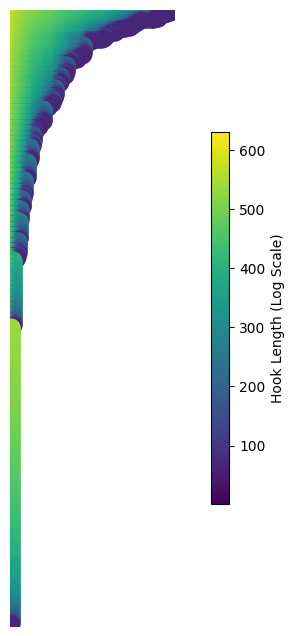

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_hook_lengths(partition):
    n = len(partition)
    hooks = np.zeros((n, max(partition)), dtype=int)
    
    for i in range(n):
        for j in range(partition[i]):
            right = partition[i] - j - 1
            down = sum(1 for k in range(i + 1, n) if partition[k] > j)
            hooks[i, j] = right + down + 1
    
    return hooks

def draw_ferrers_diagram(partition):
    """
    Draws a Ferrers diagram with dots for a given integer partition.
    Colors the dots based on hook lengths.

    Parameters:
    partition (list of int): A list of integers representing the partition of an integer. 
                             Each integer corresponds to the number of dots in a row of the diagram.
    """
    # Validate the input
    if not all(isinstance(x, int) and x > 0 for x in partition):
        raise ValueError("All elements in the partition must be positive integers.")

    # Calculate hook lengths
    hook_lengths = calculate_hook_lengths(partition)
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Define colormap
    cmap = plt.get_cmap("viridis")
    max_hook_length = np.max(hook_lengths)

    # Draw the Ferrers diagram with dots
    for i, row_length in enumerate(partition):
        for j in range(row_length):
            hook_length = hook_lengths[i, j]
            color = cmap(np.log1p(hook_length) / np.log1p(max_hook_length))  # Use logarithmic scaling
            ax.plot(j, -i, 'o', markersize=12, color=color)  # 'o' means circle marker

    # Set axis limits and aspect ratio
    ax.set_xlim(-0.5, max(partition) + 0.5)
    ax.set_ylim(-len(partition) - 0.5, 0.5)
    ax.set_aspect('equal')
    ax.axis('off')  # Turn off the axis

    # Add colorbar with logarithmic scale
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1, vmax=max_hook_length))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label('Hook Length (Log Scale)')

    # Show the plot
    plt.show()

# Example usage
draw_ferrers_diagram(RandomNumericalSemigroupWithGenus(500).partition())

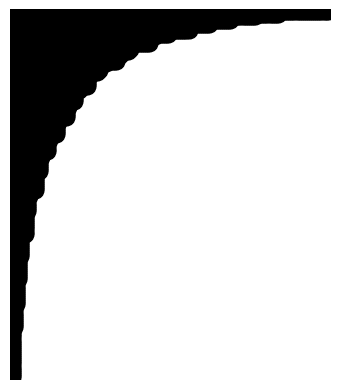

In [19]:
draw_ferrers_diagram(S.partition())

In [38]:
S.minimal_generating_set()

[198,
 240,
 304,
 310,
 326,
 341,
 344,
 353,
 361,
 367,
 370,
 375,
 379,
 382,
 389,
 391,
 392,
 394,
 398,
 404,
 412,
 418,
 423,
 424,
 427,
 433,
 434,
 440,
 441,
 442,
 446,
 452,
 456,
 460,
 461,
 463,
 464,
 466,
 469,
 475,
 476,
 477,
 478,
 479,
 482,
 483,
 484,
 486,
 494,
 498,
 504,
 507,
 510,
 516,
 517,
 521,
 522,
 525,
 530,
 533,
 534,
 536,
 541,
 543,
 547,
 549,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 561,
 562,
 563,
 567,
 569,
 570,
 571,
 578,
 579,
 582,
 585,
 588,
 597,
 598,
 600,
 603,
 604,
 605,
 606,
 617,
 618,
 623,
 626,
 628,
 633,
 637,
 641,
 642,
 646,
 647,
 649,
 653,
 655,
 656,
 666,
 691,
 707,
 710,
 712,
 713,
 721]